<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】コンペティション内容の把握

###1. Home Creditはどのような企業？
Home Creditでは、信用履歴がない人々に金融サービスを提供し、安全で前向きな借入体験を通じて金融包摂を推進しいる。


###2. このコンペティションでは何を予測する？
通信データや取引情報などの代替データを活用して返済能力を予測する。
顧客が返済可能な条件でローンを提供することで、未利用層を支援する。


###3. それを予測することで企業が得られるメリットは何？
従来、信用履歴が不十分または存在しないためにローンを受けるのに苦労している層は、不当な貸し手によって損することが多かった。Home Creditは、返済可能な元本、期間、返済スケジュールでローンが提供できるように予測することで、より多くの人が借入し、手数料や利息収入が得られる。
また、分析したデータをサービスとして提供することでも新たなビジネスを展開できると考えられる。

##【問題】データの概観の把握

In [78]:
import pandas as pd
df_original = pd.read_csv('/application_test.csv')

In [28]:
df.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [79]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [80]:
df_original.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  FLAG_DOCUMENT_18  \
count  48744.000000   48744.000000       48744.000000  ...      48744.000000   
mean  -16068.084605   67485.366322       -4967.652716  ...          0.001559   
std     4325.900393  144348.507136        3552.612035  ...          0.039456   
min   -25195.000000  -17463.000000      -23722.000000  ...          0.000000   
25%   -19637.000000   -2910.000000       -7459.250000  ...          0.000000   
50%   -15785.000000   -1293.000000       -4490.000000  ...          0.000000   
75%   -12496.000000    -296.000000       -1901.000000  ...          0.000000   
max    -7338.000000  365243.000000           0.000000  ...          1.000000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count           48744.0           48744.0           48744.0   
mean                0.0               0.0               0.0   
std                 0.0               0.0               0.0   
min                 0.0               0.0               0.0   
25%                 0.0               0.0               0.0   
50%                 0.0               0.0               0.0   
75%                 0.0               0.0               0.0   
max                 0.0               0.0               0.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                42695.000000               42695.000000   
mean                     0.002108                   0.001803   
std                      0.046373                   0.046132   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   2.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                42695.000000               42695.000000   
mean                     0.002787                   0.009299   
std                      0.054037                   0.110924   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   6.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count               42695.000000                42695.000000  
mean                    0.546902                    1.983769  
std                     0.693305                    1.838873  
min                     0.000000                    0.000000  

##【問題3】課題設定
1. 車や子どもの有無、ジェンダーなど、どの特徴量が所得との相関が大きいのか
2. 同様に、どの特徴量が年金の額との相関が大きいのか
3. 同様に、どの特徴量がクレジット残高との相関が大きいのか
4. 121個もの特徴量があるが、主に分析に有効なものはどれなのか（欠損値が多いものを除くとどの特徴量が残るか）
5. 顧客属性に関する特徴量と、住居や資産に関する情報の特徴量の間で、相関が大きいものはどれか。
※その他の相関の大きい項目同士にはどんなものがあるのか

###追記
相関関係のこと、同じ元データから取っているデータの組が極めて多く、その他に面白いことがあまり分からなかったため、設定課題を追加した。
6. ローン申請者の年齢はどう分布しているのか
7. 年齢とローン申請額の関係はあるのか
8. 収入タイプとローン申請額に関係はありそうか

##【問題4】

###4.欠損値の分布を調べる

In [81]:
# 各列の欠損値数を確認
print(df_original.isnull().sum())

# 各列の欠損値割合を確認
print(df_original.isnull().mean() * 100)

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 121, dtype: float64


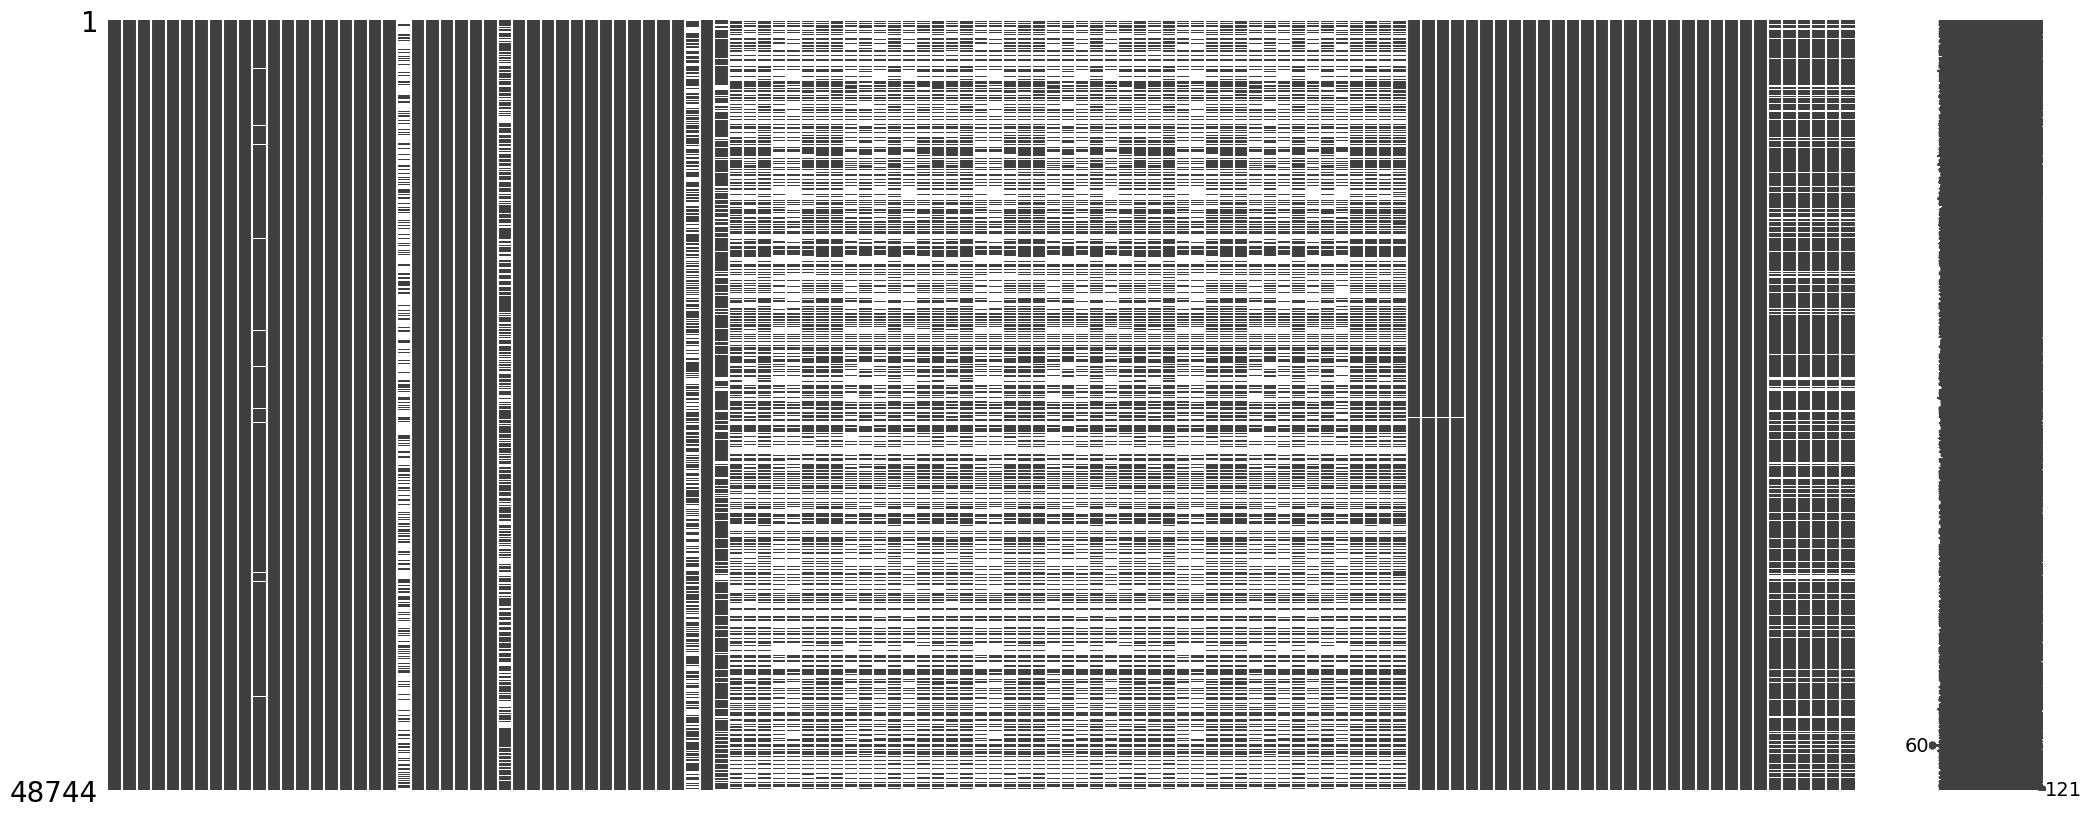

In [82]:
import matplotlib.pyplot as plt
msno.matrix(df_original)
plt.show() #図にしてみる

中央に欠損値の多いデータが集まっている。

###データを調整する
- 欠損値の多い列・行を削除する
- 性別などのデータも相関の分析に扱えるように整える

In [83]:
# 5つ以上欠損値がある特徴量（列）を削除する

import pandas as pd

# 各列の欠損値の個数を数える
missing_counts = df_original.isnull().sum()

# 5つ以上の欠損値のある列を特定する
columns_to_drop = missing_counts[missing_counts >= 5].index

# 削除
df = df_original.drop(columns=columns_to_drop)

# 欠損値のある行を特定する
lines_to_drop = df[df.isnull().any(axis=1)].index

# 削除
df = df.drop(index=lines_to_drop)

print(df.head())

   SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0         450000.0   
1             0           99000.0    222768.0         180000.0   
2             0          202500.0    663264.0         630000.0   
3             2          315000.0   1575000.0        1575000.0   
4             1          180000.0    625500.0         625500.0   

  NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0          Working  ...                0                0     

In [38]:
# 数値データ以外の列を表示
import pandas as pd
df = pd.read_csv('/application_test.csv')
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(df[non_numeric_cols].head())

  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           F            N               Y   Unaccompanied   
1         Cash loans           M            N               Y   Unaccompanied   
2         Cash loans           M            Y               Y             NaN   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            Y               N   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          Working               Higher education            Married   
1          Working  Secondary / secondary special            Married   
2          Working               Higher education            Married   
3          Working  Secondary / secondary special            Married   
4          Working  Secondary / secondary special            Married   

   NAME_HOUSING_TYPE     OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House 

In [39]:
# non_numeric_colsの列の文字データを、上から出てきた順に0から番号を振って数値データ化する

import pandas as pd

# 前のコードからの続き
df = pd.read_csv('/application_test.csv')
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# 各列のユニークな値を保持する辞書
unique_values_dict = {}

# 各列のユニークな値を記録
for col in non_numeric_cols:
    unique_values_dict[col] = []
    for val in df[col].unique():
      if not pd.isna(val): #欠損値は除く
        unique_values_dict[col].append(val)

# 各列をループし、出現順に数値化
for col in non_numeric_cols:
    value_mapping = {value: index for index, value in enumerate(unique_values_dict[col])}
    df[col] = df[col].map(value_mapping)

# 結果の表示
print(df[non_numeric_cols].head())


   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            0             0                0   
1                   0            1             0                0   
2                   0            1             1                0   
3                   0            0             0                0   
4                   0            1             1                1   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0              0.0                 0                    0                   0   
1              0.0                 0                    1                   0   
2              NaN                 0                    0                   0   
3              0.0                 0                    1                   0   
4              0.0                 0                    1                   0   

   NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0                  0         

1.所得との相関が大きい特徴量を特定し可視化する

In [63]:
#所得（AMT_INCOME_TOTAL）との相関が大きい特徴量はどれであるか可視化する

# AMT_INCOME_TOTALとの相関係数の絶対値が高い順にソート
corr_with_target = df.corr()['AMT_INCOME_TOTAL'].abs().sort_values(ascending=False)

# 上位10個の特徴量を選択
top_10_features_INCOME = corr_with_target.index[0:11]

top_10_features_INCOME

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLAG_OWN_CAR',
       'REGION_POPULATION_RELATIVE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'NAME_EDUCATION_TYPE'],
      dtype='object')

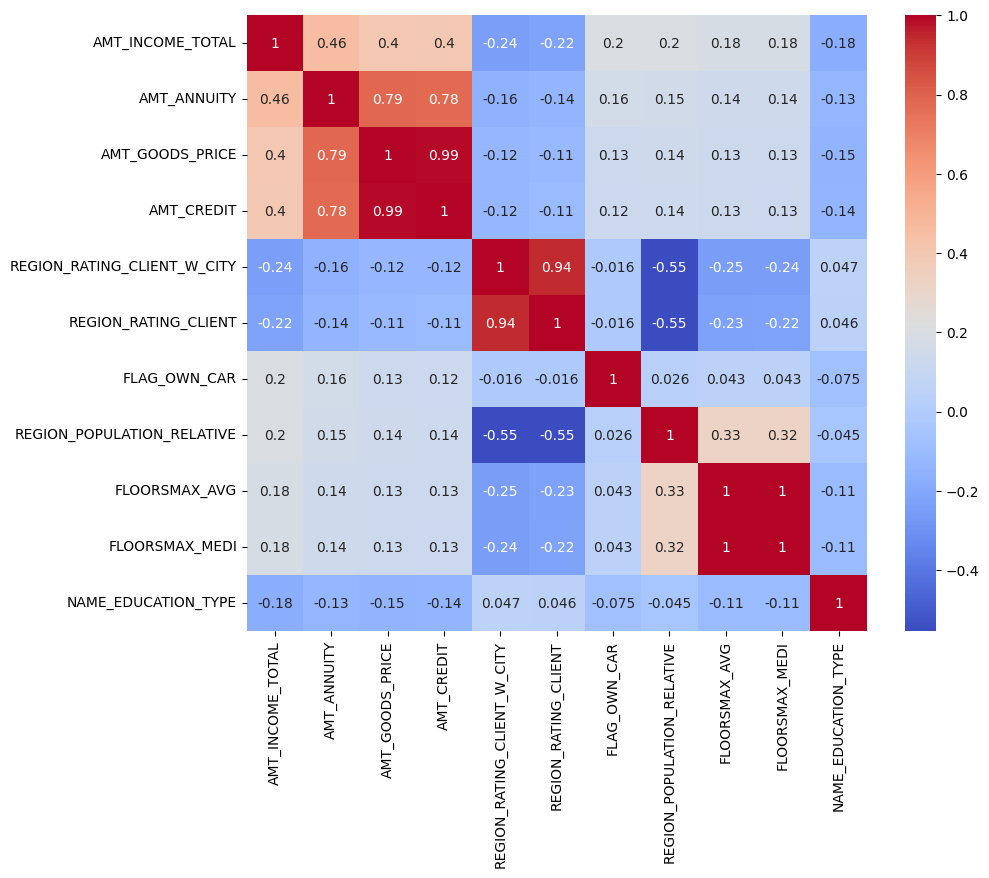

In [64]:
#top_10_featuresのみの相関係数行列ヒートマップを作る
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[top_10_features_INCOME].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #Pass the correlation matrix to sns.heatmap
plt.show()

###2.どの特徴量が年金の額との相関が大きいのか

In [65]:
#年金（AMT_ANNUITY）との相関が大きい特徴量はどれであるか可視化する

# 相関係数の絶対値が高い順にソート
corr_with_target = df.corr()['AMT_ANNUITY'].abs().sort_values(ascending=False)

# 上位10個の特徴量を選択
top_10_features_ANNUITY = corr_with_target.index[0:11]

top_10_features_ANNUITY

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'FLAG_OWN_CAR', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_POPULATION_RELATIVE', 'NAME_FAMILY_STATUS', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'REGION_RATING_CLIENT'],
      dtype='object')

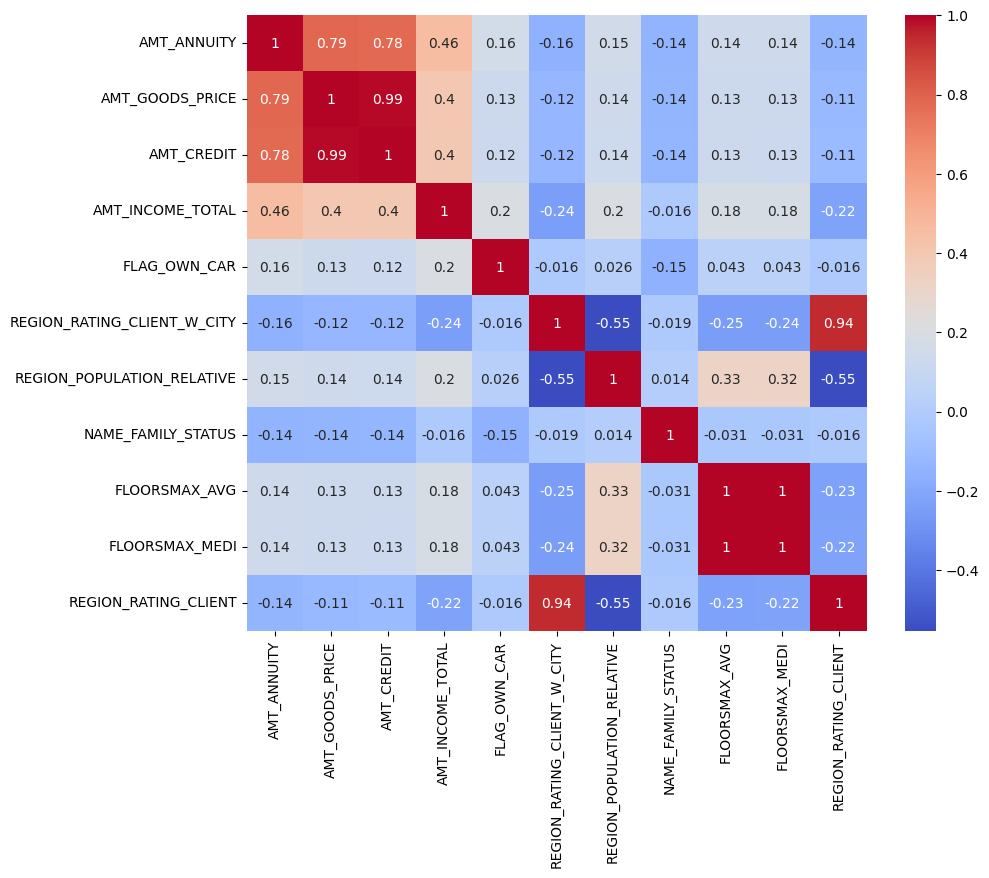

In [66]:
#top_10_features_ANNUITYのみの相関係数行列ヒートマップを作る
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[top_10_features_ANNUITY].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #Pass the correlation matrix to sns.heatmap
plt.show()

###3. どの特徴量がクレジット残高との相関が大きいのか

In [67]:
corr_with_target = df.corr()['AMT_CREDIT'].abs().sort_values(ascending=False)

# 上位10個の特徴量を選択
top_10_features_CREDIT = corr_with_target.index[0:11]

top_10_features_CREDIT

Index(['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL',
       'EXT_SOURCE_1', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'NAME_FAMILY_STATUS', 'EXT_SOURCE_2', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI'],
      dtype='object')

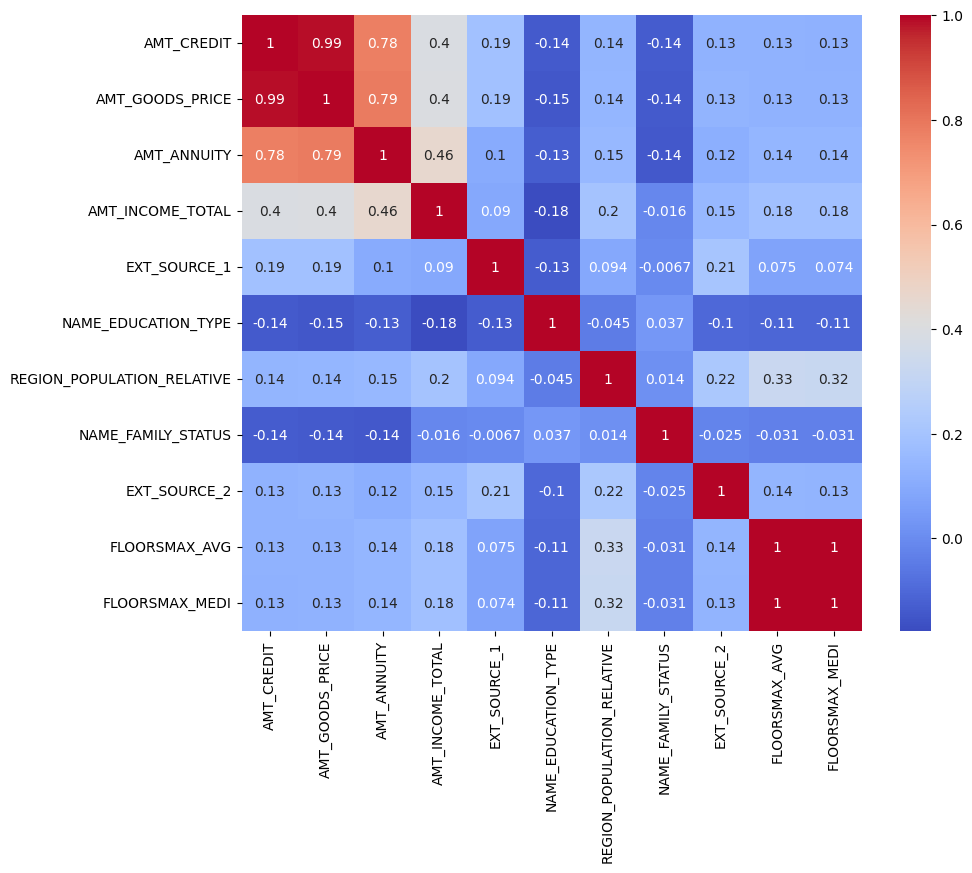

In [68]:
#top_10_features_CREDITのみの相関係数行列ヒートマップを作る
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[top_10_features_CREDIT].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') #Pass the correlation matrix to sns.heatmap
plt.show()

###5. 顧客属性に関する特徴量と、住居や資産に関する情報の特徴量の間で、相関が大きいものはどれか。
※その他の相関の大きい項目同士にはどんなものがあるのか

In [69]:
# 全ての特徴量間で、相関係数の絶対値が大きい組を大きい順に10組挙げる

# 相関係数行列の計算
corr_matrix = df.corr()

# 相関係数の絶対値を取得
abs_corr_matrix = corr_matrix.abs()

# 対角成分を0にする（自分自身との相関は1なので）
abs_corr_matrix = abs_corr_matrix.mask(np.equal(*np.indices(abs_corr_matrix.shape)))

# 相関係数の絶対値が大きい順にソート
sorted_corr = abs_corr_matrix.unstack().sort_values(ascending=False)

# 上位10個の組み合わせを表示
print(sorted_corr.head(10))

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999830
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999830
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.999543
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.999543
YEARS_BUILD_MEDI              YEARS_BUILD_AVG                 0.998818
YEARS_BUILD_AVG               YEARS_BUILD_MEDI                0.998818
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.997679
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.997679
LIVINGAPARTMENTS_AVG          LIVINGAPARTMENTS_MEDI           0.996943
LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_AVG            0.996943
dtype: float64


ほとんどが、_AVGと_MEDIのように、同じ元データから算出されているペアで提供される特徴量のために類似した傾向を示している。
また、OBS_30_CNT_SOCIAL_CIRCLEとOBS_60_CNT_SOCIAL_CIRCLEは観察期間が異なるだけで、基になるデータが共通している組も相関係数が強くなってしまう。
今度はこれを除外してみたい。

In [73]:
import pandas as pd

# 相関行列を計算
correlation_matrix = df.corr()

# 相関行列を長い形式に変換
correlation_pairs = (
    correlation_matrix.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature1", "level_1": "Feature2", 0: "Correlation"})
)

# 同じ特徴量間（自己相関）は除外
correlation_pairs = correlation_pairs[correlation_pairs["Feature1"] != correlation_pairs["Feature2"]]

# 同じ元データから取られた特徴量ペアを除外
# 特徴量名の一部が '_AVG' と '_MEDI' と'_MODE'で終わる場合
filtered_pairs = correlation_pairs[
    ~(
        (correlation_pairs["Feature1"].str.contains("_AVG") & correlation_pairs["Feature2"].str.contains("_MEDI")) |
        (correlation_pairs["Feature1"].str.contains("_MEDI") & correlation_pairs["Feature2"].str.contains("_AVG")) |
        (correlation_pairs["Feature1"].str.contains("_MODE") & correlation_pairs["Feature2"].str.contains("_MEDI")) |
        (correlation_pairs["Feature1"].str.contains("_MEDI") & correlation_pairs["Feature2"].str.contains("_MODE")) |
        (correlation_pairs["Feature1"].str.contains("_MODE") & correlation_pairs["Feature2"].str.contains("_AVG")) |
        (correlation_pairs["Feature1"].str.contains("_AVG") & correlation_pairs["Feature2"].str.contains("_MODE"))
    )
]

# 絶対値で上位10組を取得
top_10_pairs = (
    filtered_pairs.assign(AbsCorrelation=filtered_pairs["Correlation"].abs())
    .sort_values("AbsCorrelation", ascending=False)
    .head(10)
)

# 結果を表示
print(top_10_pairs)

                          Feature1                     Feature2  Correlation  \
2431                FLAG_EMP_PHONE                DAYS_EMPLOYED    -0.999830   
1891                 DAYS_EMPLOYED               FLAG_EMP_PHONE    -0.999830   
10152     OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE     0.999543   
9934      OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE     0.999543   
996                AMT_GOODS_PRICE                   AMT_CREDIT     0.988056   
778                     AMT_CREDIT              AMT_GOODS_PRICE     0.988056   
5852          LIVINGAPARTMENTS_AVG               APARTMENTS_AVG     0.943339   
4772                APARTMENTS_AVG         LIVINGAPARTMENTS_AVG     0.943339   
3211          REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY     0.942479   
3320   REGION_RATING_CLIENT_W_CITY         REGION_RATING_CLIENT     0.942479   

       AbsCorrelation  
2431         0.999830  
1891         0.999830  
10152        0.999543  
9934         0.999543  

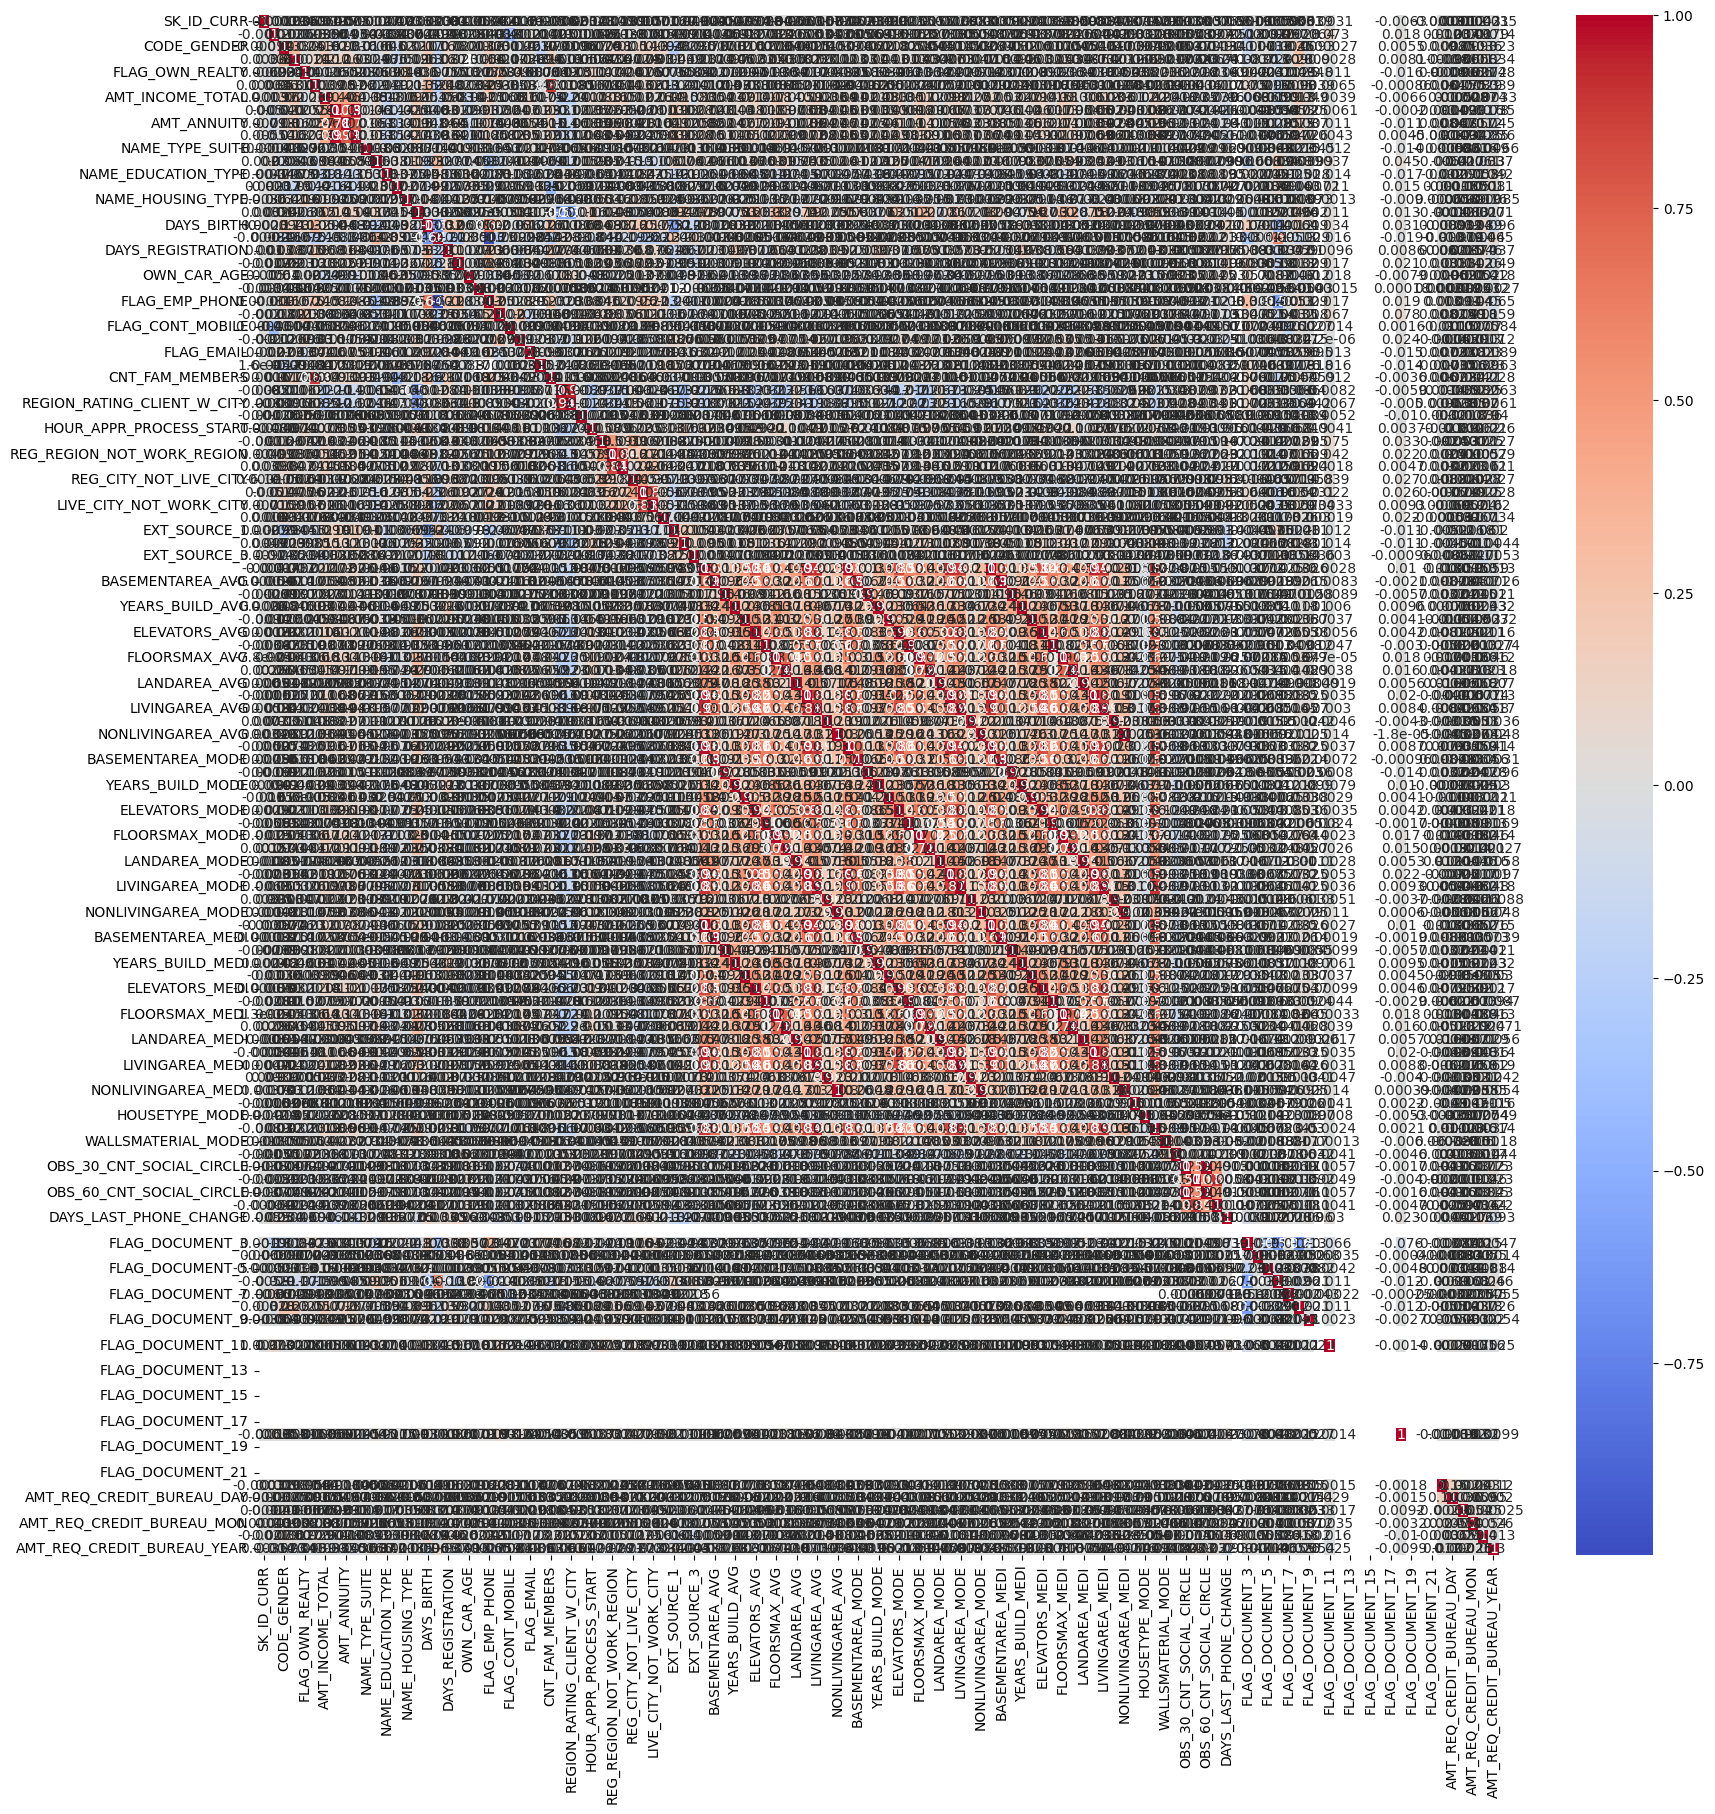

In [58]:
#個人的に興味もあったので、全体の相関係数行列のヒートマップも出してみた。
import numpy as np
plt.figure(figsize=(20, 20))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

###6.年齢データ分布を可視化したい

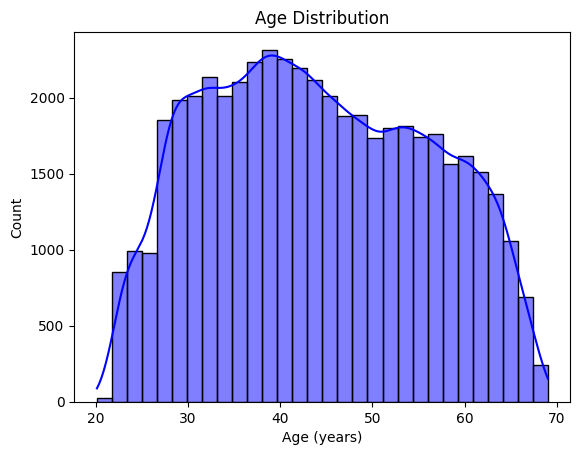

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# 年齢を計算 (DAYS_BIRTH は負の値なので絶対値に変換)
df['AGE'] = df['DAYS_BIRTH'] / -365

# ヒストグラムをプロット
sns.histplot(df['AGE'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

20～22歳の顧客が著しく少なく、30～40代が50～60代よりも多いことが分かる。

###7.年齢とローン申請額の関係

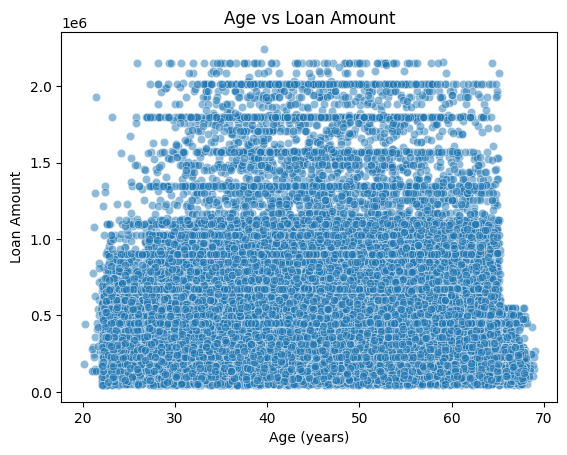

In [75]:
# 散布図
sns.scatterplot(x='AGE', y='AMT_CREDIT', data=df, alpha=0.5)
plt.title('Age vs Loan Amount')
plt.xlabel('Age (years)')
plt.ylabel('Loan Amount')
plt.show()

60代後半から、60,0000以上のローン申請がないことが分かる。

###8.収入タイプとローン申請額の関係を見る

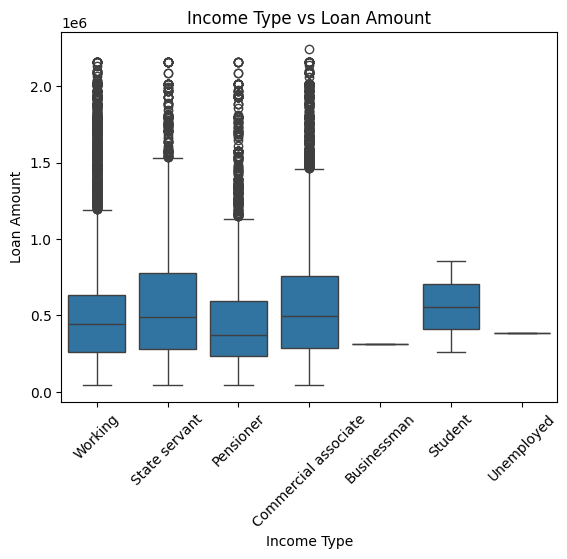

In [84]:
sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT', data=df)
plt.title('Income Type vs Loan Amount')
plt.xlabel('Income Type')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

ビジネスマン・雇用の無い人のレンジは極めて狭く、申請者数自体も少ない可能性が高い。
全体的に特筆すべきは、国家公務員と商業従事者のローン申請額は高額まで幅広い一方、学生のローン額は50,0000を中心に狭い範囲に収まっている。